In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from scipy.stats import norm
from pandas_datareader import DataReader
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
# tech_list = ['NFLX', 'AAPL']

# # set up Start and End time for data grab
# start = datetime(end.year-3,end.month,end.day)
# print(start)
# print(end)
# for stock in tech_list:
#     globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [3]:
current = datetime.now()

In [4]:
train_start = datetime(current.year-3, current.month, current.day)
train_end = datetime(current.year-1, current.month, current.day)
train_data = DataReader('AAPL', 'yahoo', train_start, train_end)
print(train_start)
print(train_end)
train_data

2016-11-20 00:00:00
2018-11-20 00:00:00


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-11-21,111.989998,110.010002,110.120003,111.730003,29264600.0,106.731606
2016-11-22,112.419998,111.400002,111.949997,111.800003,25965500.0,106.798477
2016-11-23,111.510002,110.330002,111.360001,111.230003,27426400.0,106.253975
2016-11-25,111.870003,110.949997,111.129997,111.790001,11475900.0,106.788933
2016-11-28,112.470001,111.389999,111.430000,111.570000,27194000.0,106.578766
...,...,...,...,...,...,...
2018-11-15,191.970001,186.899994,188.389999,191.410004,46478800.0,188.576630
2018-11-16,194.970001,189.460007,190.500000,193.529999,36928300.0,190.665237
2018-11-19,190.699997,184.990005,190.000000,185.860001,41925300.0,183.108780


In [5]:
test_start = datetime(current.year-1, current.month, current.day+1)
test_end = current
test_data = DataReader('AAPL', 'yahoo', test_start, test_end)
print(test_start)
print(test_end)
test_data

2018-11-21 00:00:00
2019-11-20 16:38:12.954671


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-11-21,180.270004,176.550003,179.729996,176.779999,31124200.0,174.163193
2018-11-23,176.600006,172.100006,174.940002,172.289993,23624000.0,169.739655
2018-11-26,174.949997,170.259995,174.240005,174.619995,44998500.0,172.035172
2018-11-27,174.770004,170.880005,171.509995,174.240005,41387400.0,171.660797
2018-11-28,181.289993,174.929993,176.729996,180.940002,46062500.0,178.261627
...,...,...,...,...,...,...
2019-11-14,264.880005,262.100006,263.750000,262.640015,22295700.0,262.640015
2019-11-15,265.779999,263.010010,263.679993,265.760010,25051600.0,265.760010
2019-11-18,267.429993,264.230011,265.799988,267.100006,21675800.0,267.100006


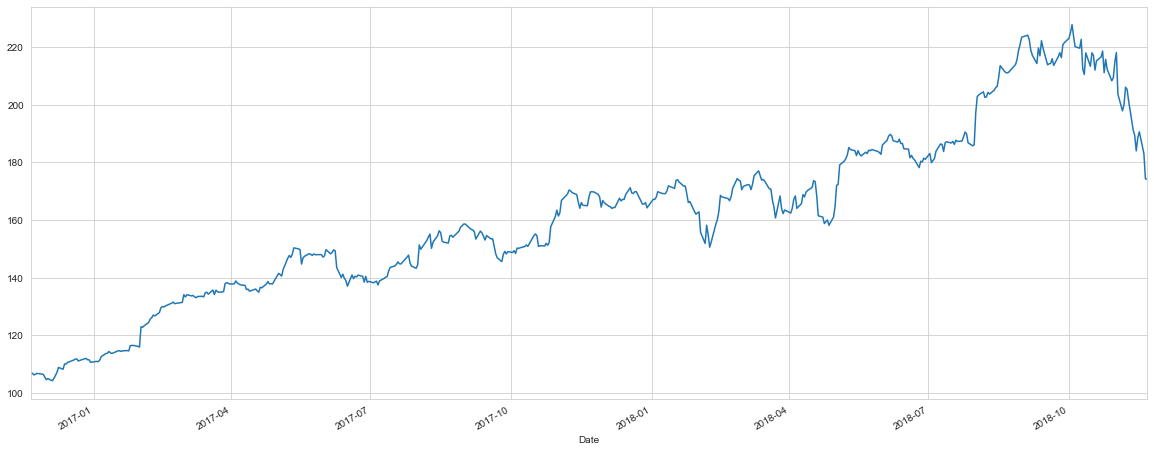

In [6]:
train_data['Adj Close'].plot(figsize=(20, 8))

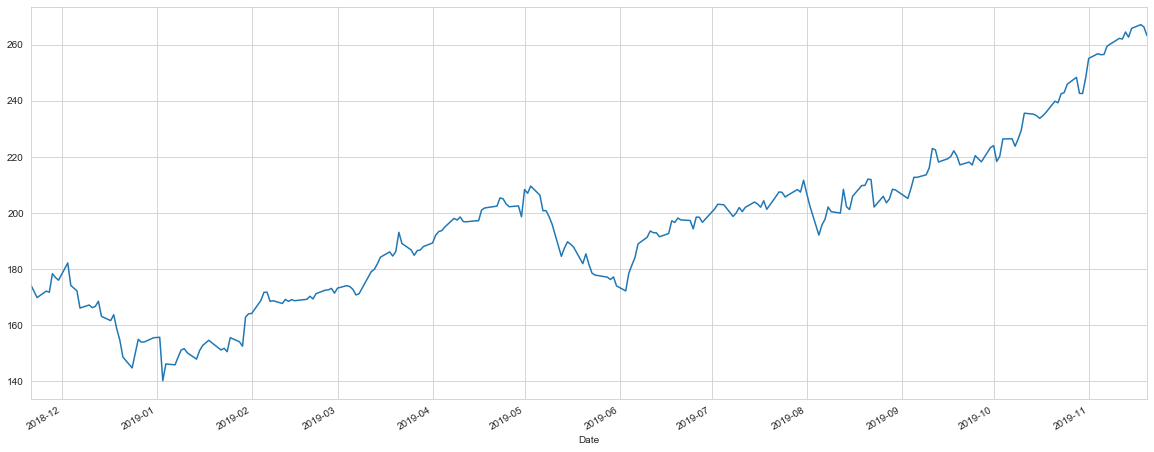

In [7]:
test_data['Adj Close'].plot(figsize=(20, 8))

In [9]:
data = test_data['Adj Close']

Take log

In [10]:
log_return = np.log(1+ data.pct_change())
log_return

Date
2018-11-21         NaN
2018-11-23   -0.025727
2018-11-26    0.013433
2018-11-27   -0.002179
2018-11-28    0.037732
                ...   
2019-11-14   -0.006943
2019-11-15    0.011809
2019-11-18    0.005029
2019-11-19   -0.003037
2019-11-20   -0.011710
Name: Adj Close, Length: 251, dtype: float64

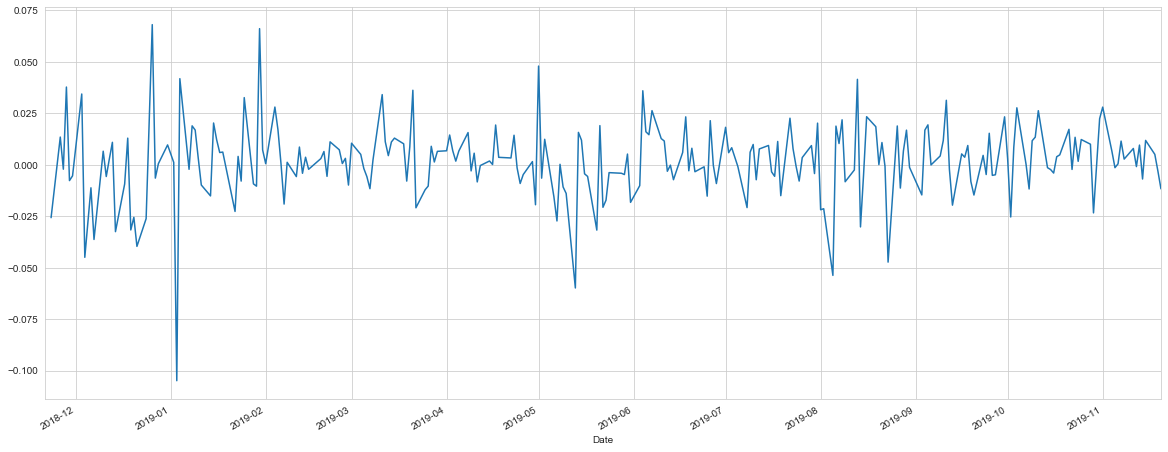

In [11]:
log_return.plot(figsize=(20, 8))

<img src='Resources/equatio.gif'>
<img src='Resources/eq2.png'>

### r = drift + stddev * e^r

In [12]:
u = log_return.mean()
u

0.0016515338602052067

In [13]:
var = log_return.var()
var

0.000336522012832804

In [14]:
drift = u - (0.5*var)
drift

0.0014832728537888047

In [15]:
stdev = log_return.std()
stdev

0.018344536321008607

In [16]:
norm.ppf(0.95)

1.6448536269514722

In [17]:
time_interval = 251
iterations = 10

In [18]:
daily_return = np.exp(drift + stdev * norm.ppf(np.random.rand(time_interval, iterations)))
daily_return

array([[0.97349037, 1.03352555, 1.02291574, ..., 1.03430736, 1.00832737,
        1.01262861],
       [0.99827487, 0.9802758 , 1.02100297, ..., 1.00318839, 0.97498097,
        1.00553536],
       [0.9963387 , 0.97191813, 1.0148793 , ..., 1.01467745, 0.98662025,
        0.98918435],
       ...,
       [0.99471215, 1.02626428, 0.97491   , ..., 1.00358862, 1.01659824,
        0.9853847 ],
       [0.99870827, 0.98259287, 1.0115701 , ..., 1.02059432, 0.97901082,
        0.99410485],
       [1.01629829, 0.97318541, 1.03061704, ..., 1.01300895, 1.01800103,
        1.02219235]])

In [19]:
price_list = np.zeros_like(daily_return)

In [20]:
price_list[0] = data.iloc[0]
price_list

array([[174.16319275, 174.16319275, 174.16319275, ..., 174.16319275,
        174.16319275, 174.16319275],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [21]:
for i in range(1, time_interval):
    price_list[i] = price_list[i-1] * daily_return[i]

In [22]:
price_list

array([[174.16319275, 174.16319275, 174.16319275, ..., 174.16319275,
        174.16319275, 174.16319275],
       [173.86273782, 170.72796273, 177.82113781, ..., 174.71849379,
        169.80579787, 175.12724841],
       [173.22617461, 165.93360213, 180.46699123, ..., 177.28291636,
        167.53383856, 173.23313348],
       ...,
       [183.83515787, 415.36596967, 154.32132099, ..., 213.47557744,
        256.21441689, 138.78540225],
       [183.59769189, 408.13563897, 156.10683467, ..., 217.87196254,
        250.83668693, 137.96724218],
       [186.59002067, 397.19164734, 160.8863634 , ..., 220.706248  ,
        255.35200444, 141.0290595 ]])

In [110]:
y_label = [] 
for i in test_data['Adj Close'].index.to_list():
    y_label.append(str(i)[:-9])

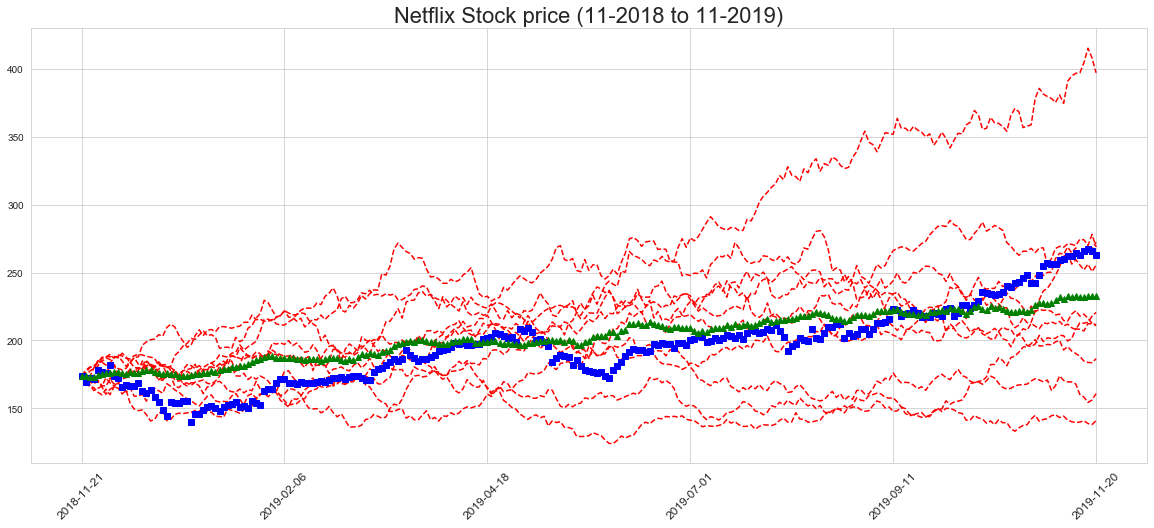

In [114]:
plt.figure(figsize=(20,8))
plt.tick_params(axis="both", which="both", bottom=False, top=False,    
                labelbottom=True, left=False, right=False, labelleft=True)        
# plt.legend(loc='upper left')

plt.title('Netflix Stock price (11-2018 to 11-2019)', fontsize=22)
plt.xticks(range(0, test_data['Adj Close'].shape[0], 50), y_label[::50] ,rotation=45, fontsize=12)    
plt.plot(price_list, 'r--', test_data['Adj Close'].to_list(), 'bs', np.mean(price_list, axis = 1), 'g^')


In [113]:
# test_data['Adj Close'].index[:-9:50]